In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Saving ginger.jpg to ginger (2).jpg
Bandholz
LightBrown
Spike


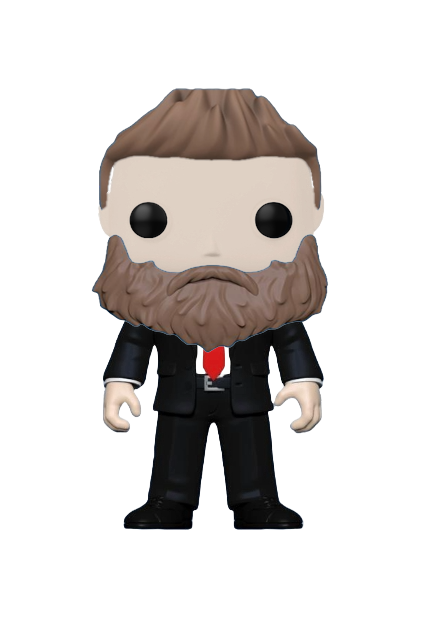

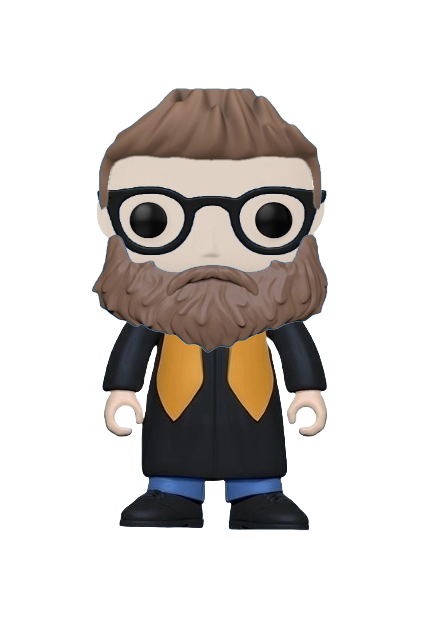

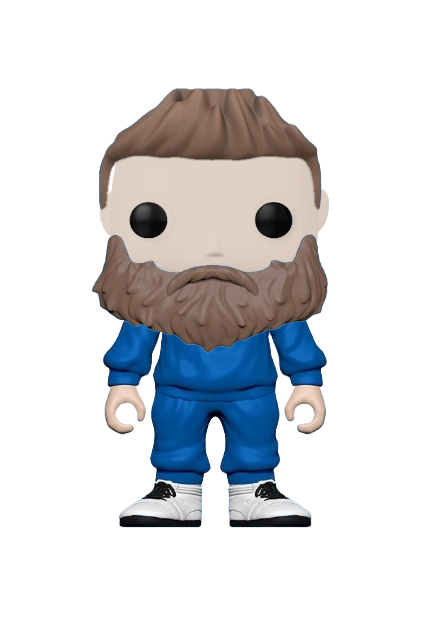

In [ ]:
# Combined Code for Beard and Hairstyle Detection and Styling

import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from google.colab import files
from PIL import Image
import numpy as np
import base64
from io import BytesIO

# Function to classify beard style
class BeardClassifier:
    def __init__(self, model_path, class_names):
        self.model = models.resnet18(pretrained=False)
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Linear(num_ftrs, len(class_names))
        self.load_model(model_path)
        self.model.eval()
        self.data_transforms = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
        self.class_names = class_names

    def preprocess_image(self, image_path):
        image = Image.open(image_path).convert("RGB")
        image = self.data_transforms(image)
        image = image.unsqueeze(0)
        return image

    def load_model(self, model_path):
        if torch.cuda.is_available():
            self.model.load_state_dict(torch.load(model_path))
        else:
            self.model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))

    def classify_beard(self, image_path):
        input_image = self.preprocess_image(image_path)
        with torch.no_grad():
            predictions = self.model(input_image)
        probabilities = torch.nn.functional.softmax(predictions[0], dim=0)
        predicted_class = torch.argmax(probabilities).item()
        predicted_label = self.class_names[predicted_class]
        return predicted_label

# Function to classify beard color
class BeardColorClassifier:
    def __init__(self, model_path, class_names):
        self.model = models.resnet18(pretrained=False)
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Linear(num_ftrs, len(class_names))
        self.load_model(model_path)
        self.model.eval()
        self.data_transforms = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
        self.class_names = class_names

    def preprocess_image(self, image_path):
        image = Image.open(image_path).convert("RGB")
        image = self.data_transforms(image)
        image = image.unsqueeze(0)
        return image

    def load_model(self, model_path):
        if torch.cuda.is_available():
            self.model.load_state_dict(torch.load(model_path))
        else:
            self.model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))

    def classify_beard_color(self, image_path):
        input_image = self.preprocess_image(image_path)
        with torch.no_grad():
            predictions = self.model(input_image)
        probabilities = torch.nn.functional.softmax(predictions[0], dim=0)
        predicted_class = torch.argmax(probabilities).item()
        predicted_label = self.class_names[predicted_class]
        return predicted_label

def dummy_eye(background_image, x, y, placeholder_image_path, x_coordinate, y_coordinate):
    placeholder_image = Image.open(placeholder_image_path)
    target_size = (x, y)
    placeholder_image = placeholder_image.resize(target_size, Image.LANCZOS)
    placeholder_array = np.array(placeholder_image)
    placeholder_width, placeholder_height = placeholder_image.size
    region_box = (x_coordinate, y_coordinate, x_coordinate + placeholder_width, y_coordinate + placeholder_height)
    placeholder_mask = placeholder_image.split()[3] if placeholder_image.mode == 'RGBA' else None
    background_image.paste(placeholder_image, region_box, mask=placeholder_mask)
    background_array = np.array(background_image)

# Function to overlay a beard on a background image
def process_image_Beard(background_image, x, placeholder_image_path, x_coordinate, y_coordinate):
    placeholder_image = Image.open(placeholder_image_path)
    target_size = (x, x)
    placeholder_image = placeholder_image.resize(target_size, Image.LANCZOS)
    placeholder_array = np.array(placeholder_image)
    placeholder_width, placeholder_height = placeholder_image.size
    region_box = (x_coordinate, y_coordinate, x_coordinate + placeholder_width, y_coordinate + placeholder_height)
    placeholder_mask = placeholder_image.split()[3] if placeholder_image.mode == 'RGBA' else None
    background_image.paste(placeholder_image, region_box, mask=placeholder_mask)
    background_array = np.array(background_image)
    placeholder_alpha = placeholder_image.split()[3] if placeholder_image.mode == 'RGBA' else None
    #display(background_image)
    # Convert the resulting image to base64
    buffered = BytesIO()
    background_image.save(buffered, format="PNG")
    base64_image = base64.b64encode(buffered.getvalue()).decode("utf-8")
    #print(base64_image)
    #return base64_image

# Function to classify hairstyle
class HairStyleClassifier:
    def __init__(self, model_path, class_names):
        self.model = models.resnet18(pretrained=False)
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Linear(num_ftrs, len(class_names))
        self.load_model(model_path)
        self.model.eval()
        self.data_transforms = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
        self.class_names = class_names

    def preprocess_image(self, image_path):
        image = Image.open(image_path).convert("RGB")
        image = self.data_transforms(image)
        image = image.unsqueeze(0)
        return image

    def load_model(self, model_path):
        if torch.cuda.is_available():
            self.model.load_state_dict(torch.load(model_path))
        else:
            self.model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))

    def classify_hair(self, image_path):
        input_image = self.preprocess_image(image_path)
        with torch.no_grad():
            predictions = self.model(input_image)
        probabilities = torch.nn.functional.softmax(predictions[0], dim=0)
        predicted_class = torch.argmax(probabilities).item()
        predicted_label = self.class_names[predicted_class]
        return predicted_label

# Function to overlay a hairstyle on a background image
def process_image_menHair(background_image, x, y, placeholder_image_path, x_coordinate, y_coordinate):
    placeholder_image = Image.open(placeholder_image_path)
    target_size = (x, y)
    placeholder_image = placeholder_image.resize(target_size, Image.LANCZOS)
    placeholder_array = np.array(placeholder_image)
    placeholder_width, placeholder_height = placeholder_image.size
    region_box = (x_coordinate, y_coordinate, x_coordinate + placeholder_width, y_coordinate + placeholder_height)
    placeholder_mask = placeholder_image.split()[3] if placeholder_image.mode == 'RGBA' else None
    background_image.paste(placeholder_image, region_box, mask=placeholder_mask)
    background_array = np.array(background_image)
    placeholder_alpha = placeholder_image.split()[3] if placeholder_image.mode == 'RGBA' else None
    display(background_image)
    # Convert the resulting image to base64
    buffered = BytesIO()
    background_image.save(buffered, format="PNG")
    base64_image = base64.b64encode(buffered.getvalue()).decode("utf-8")
    #print(base64_image)
    #return base64_image

background_image_paths = [
    "/content/drive/MyDrive/AdobeColorFunko/Outfits/DummyDress1.png",
    "/content/drive/MyDrive/AdobeColorFunko/Outfits/GlassesDummy.png",
    "/content/drive/MyDrive/AdobeColorFunko/Outfits/DummyDress3.png"
]

# Sample usage:
# Load the user's uploaded image
uploaded_files = files.upload()
uploaded_image_name = list(uploaded_files.keys())[0]
input_image_path = uploaded_image_name

# Detect and classify beard style
beard_classifier = BeardClassifier('/content/drive/MyDrive/FunkoSavedModels/FunkoResnet18BeardStyle.pt',
                                    ['Bandholz', 'CleanShave', 'FullGoatee', 'Moustache', 'RapIndustryStandards', 'ShortBeard'])
predicted_style_label = beard_classifier.classify_beard(input_image_path)
print(predicted_style_label)

# Detect and classify beard color
beard_color_classifier = BeardColorClassifier('/content/drive/MyDrive/FunkoSavedModels/FunkoResnet18Color.pt',
                                              ['Black', 'DarkBrown', 'Ginger', 'LightBrown', 'SaltAndPepper', 'White'])
predicted_color_label = beard_color_classifier.classify_beard_color(input_image_path)
print(predicted_color_label)

# Classify hairstyle
hair_style_classifier = HairStyleClassifier('/content/drive/MyDrive/FunkoSavedModels/FunkoResnet18HairStyle.pt', ['Afro', 'Bald', 'Puff', 'Spike'])
predicted_hairStyle_label = hair_style_classifier.classify_hair(input_image_path)
print(predicted_hairStyle_label)

# Process background images and apply beard style and color along with hair style and color
for background_image_path in background_image_paths:
    background_image = Image.open(background_image_path)
    x_coordinate = 90
    y_coordinate = 50
    dummy_eye(background_image, 245, 345, f"/content/drive/MyDrive/AdobeColorFunko/EyezBrowz/MaleEye.png",
              x_coordinate, y_coordinate)

    if predicted_style_label == 'Bandholz':
        process_image_Beard(background_image, 320,
                             f"/content/drive/MyDrive/AdobeColorFunko/Beard/Bandholz/{predicted_color_label}.png",
                             50, 142)

    if predicted_style_label == 'ShortBeard':
        process_image_Beard(background_image, 300,
                             f"/content/drive/MyDrive/AdobeColorFunko/Beard/ShortBeard/{predicted_color_label}.png",
                             62, 118)

    if predicted_style_label == 'FullGoatee':
        process_image_Beard(background_image, 230,
                             f"/content/drive/MyDrive/AdobeColorFunko/Beard/Goatee/{predicted_color_label}.png",
                             96, 168)

    if predicted_style_label == 'RapIndustryStandards':
        process_image_Beard(background_image, 290,
                             f"/content/drive/MyDrive/AdobeColorFunko/Beard/RapIndustry/{predicted_color_label}.png",
                             67, 120)

    if predicted_style_label == 'Moustache':
        process_image_Beard(background_image, 220,
                             f"/content/drive/MyDrive/AdobeColorFunko/Beard/Moustache/{predicted_color_label}.png",
                             100, 160)

    if predicted_style_label == 'CleanShave':
        process_image_Beard(background_image, 220,
                             f"/content/drive/MyDrive/AdobeColorFunko/Beard/CleanShave/{predicted_color_label}.png",
                             100, 160)

    # Overlay hairstyle
    if predicted_hairStyle_label == 'Afro':
        process_image_menHair(background_image, 336, 420,
                               f"/content/drive/MyDrive/AdobeColorFunko/MenHairstyle/Afro/{predicted_color_label}.png",
                               41, 76)

    if predicted_hairStyle_label == 'Puff':
        process_image_menHair(background_image, 320, 420,
                               f"/content/drive/MyDrive/AdobeColorFunko/MenHairstyle/Puff/{predicted_color_label}.png",
                               50, 68)

    if predicted_hairStyle_label == 'Spike':
        process_image_menHair(background_image, 310, 420,
                               f"/content/drive/MyDrive/AdobeColorFunko/MenHairstyle/Spike/{predicted_color_label}.png",
                               50, 70)

    if predicted_hairStyle_label == 'Bald':
        process_image_menHair(background_image, 310, 420,
                               f"/content/drive/MyDrive/AdobeColorFunko/MenHairstyle/Bald/{predicted_color_label}.png",
                               67, 120)


